In [ ]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.dates as mdates
import matplotlib.dates as mdates

In [ ]:
url = "https://financialmodelingprep.com/api/v3/income-statement/BLK?limit=120&apikey=<input_api_key_here>"

response = requests.get(url)

income_statement_data = response.json()

In [ ]:
url = "https://financialmodelingprep.com/api/v3/balance-sheet-statement/BLK?limit=120&apikey=<input_api_key_here>"

response = requests.get(url)

balance_sheet_data = response.json()

In [ ]:
url = "https://financialmodelingprep.com/api/v3/cash-flow-statement/BLK?limit=120&apikey=<input_api_key_here>"

response = requests.get(url)

cash_flow_data = response.json()

In [ ]:
import pandas as pd
income_data = []
for item in income_statement_data:
    year = item['date'][:4]
    if year.isdigit() and int(year) >= 2015:
        income_data.append({'year': year, 'revenue': item['revenue'],
                            'Earnings per share' : item['eps'], 
                            'Gross Profit' : item['grossProfit'],
                            'Net Income' : item['netIncome'],
                            'Income Before Tax' : item['incomeBeforeTax'],
                             'Income Expense' : item['interestExpense'],
                            'ebitda' : item['ebitda'],
                            'Cost Of Revenue' : item['costOfRevenue']})

df_income_statement = pd.DataFrame(income_data)
df_income_statement = df_income_statement.sort_values(by='year')

# Print the data frame
print(df_income_statement)

   year      revenue  Earnings per share  Gross Profit  Net Income  \
7  2015  11401000000               20.10    6172000000  3345000000   
6  2016  11155000000               19.29    6046000000  3172000000   
5  2017  12491000000               30.54    6823000000  4970000000   
4  2018  14198000000               26.86    7205000000  4305000000   
3  2019  14539000000               28.69    7406000000  4476000000   
2  2020  16205000000               32.13    8266000000  4932000000   
1  2021  19374000000               38.45    9818000000  5901000000   
0  2022  17873000000               33.74    8787000000  5178000000   

   Income Before Tax  Income Expense      ebitda  Cost Of Revenue  
7         4602000000       204000000  5046000000       5229000000  
6         4460000000       205000000  4896000000       5109000000  
5         5277000000       205000000  5685000000       5668000000  
4         5378000000       184000000  5785000000       6993000000  
3         5787000000       20

In [ ]:
import pandas as pd
balance_data = []
for item in balance_sheet_data:
    year = item['date'][:4]
    if year.isdigit() and int(year) >= 2015:
        balance_data.append({'year': year, 'Total Current Assets': item['totalCurrentAssets'],
                            'Total Current Liabilities' : item['totalCurrentLiabilities'], 
                            'Inventory' : item['inventory'], 
                            'Total Assets' : item['totalAssets'],
                             'Total Debt' : item['totalDebt'],
                            'Total liabilities' : item['totalLiabilities'],
                             'Total Equity' : item['totalEquity'],
                            'Total Stock Holders Equity' : item['totalStockholdersEquity'],
                             'Number of shares' : item['commonStock'],
                             'Net Account Receivable' : item['netReceivables'],
                             'Net PPE' : item['propertyPlantEquipmentNet'],
                             'Accounts Payable' : item['accountPayables']
                             })

df_balance_sheet = pd.DataFrame(balance_data)
df_balance_sheet = df_balance_sheet.sort_values(by='year')

# Print the data frame
print(df_balance_sheet)

   year  Total Current Assets  Total Current Liabilities  Inventory  \
7  2015            8468000000                 1068000000          0   
6  2016            8525000000                 1094000000          0   
5  2017            9737000000                 1161000000          0   
4  2018            9145000000                 1292000000          0   
3  2019            8008000000                 1167000000          0   
2  2020           12199000000                 1028000000          0   
1  2021           20374000000                 7488000000          0   
0  2022           16445000000                 1294000000          0   

   Total Assets  Total Debt  Total liabilities  Total Equity  \
7  225261000000  4930000000       196681000000   28503000000   
6  220177000000  4915000000       191027000000   29098000000   
5  220217000000  5014000000       188342000000   31825000000   
4  159573000000  5063000000       127140000000   32374000000   
3  168622000000  4955000000       135009

In [ ]:
import pandas as pd
cash_data = []
for item in cash_flow_data:
    year = item['date'][:4]
    if year.isdigit() and int(year) >= 2015:
        cash_data.append({'year': year, 
                          'Cash from Operations': item['operatingCashFlow'],
                          'Free Cash Flow': item['freeCashFlow'],
                          'Net change in Cash' : item['netChangeInCash'],
                          'Inventory' : item ['inventory'],
                          'Dividends Paid': item ['dividendsPaid']
                             })

df_cash_flow = pd.DataFrame(cash_data)
df_cash_flow = df_cash_flow.sort_values(by='year')

# Print the data frame
print(df_cash_flow)

   year  Cash from Operations  Free Cash Flow  Net change in Cash  Inventory  \
7  2015            3004000000      2783000000           360000000          0   
6  2016            2154000000      2035000000             8000000          0   
5  2017            3828000000      3673000000           803000000          0   
4  2018            3075000000      2871000000          -591000000          0   
3  2019            2884000000      2630000000         -1659000000          0   
2  2020            3743000000      3549000000          3835000000          0   
1  2021            4944000000      4603000000           659000000          0   
0  2022            4956000000      4423000000         -1907000000          0   

   Dividends Paid  
7     -1476000000  
6     -1545000000  
5     -1662000000  
4     -1968000000  
3     -2096000000  
2     -2260000000  
1     -2547000000  
0     -2990000000  


In [ ]:
df_balance_sheet.set_index('year', inplace=True)
df_income_statement.set_index('year', inplace=True)
df_cash_flow.set_index('year', inplace=True)

In [ ]:
financial_ratio = pd.DataFrame({
    'Year' : df_balance_sheet.index,
    'Current Ratio' : df_balance_sheet['Total Current Assets']/df_balance_sheet['Total Current Liabilities'],
    'Liabilities to Equity Ratio' : df_balance_sheet['Total Current Liabilities']/ df_balance_sheet['Total Stock Holders Equity'],
    'Profitability : Gross Profit Margin' : df_income_statement['Gross Profit'] / df_income_statement['revenue'],
    'Profitability : Net Profit Margin' : df_income_statement['Net Income'] / df_income_statement['revenue'],
    'Profitability: Retun on Equity' : df_income_statement['Net Income'] / df_balance_sheet['Total Stock Holders Equity'],
    'Efficiency : Asset turnover ratio' : df_income_statement['revenue'] / df_balance_sheet['Total Current Assets'],
    'Financial Leverage Ratio' : df_balance_sheet['Total Debt']/ df_balance_sheet['Total Equity'],
    'Ratio of Cash from Operations to Total Debt' : df_cash_flow['Cash from Operations']/df_balance_sheet['Total Debt'],
    'Ratio of Free operating to Total Debt' : df_cash_flow['Free Cash Flow']/df_balance_sheet['Total Debt'],
    'Quick Ratio' : (df_balance_sheet['Total Current Assets']-df_cash_flow['Inventory'])/df_balance_sheet['Total Current Liabilities'],
    'Debt to Equity Ratio' : df_balance_sheet['Total Debt']/ df_balance_sheet['Total Stock Holders Equity'],
    'Dividend Payout Ratio' : (df_balance_sheet['Number of shares']/df_cash_flow['Dividends Paid'])/df_income_statement['Earnings per share'],
    'Dividend Yield' : (df_balance_sheet['Number of shares']/df_cash_flow['Dividends Paid'])/214,
    'A/R turnover' : df_income_statement['revenue']/df_balance_sheet['Net Account Receivable'],
    '# Days Sales Outstanding' : (df_balance_sheet['Net Account Receivable']/df_income_statement['revenue'])*360,
    'Inventory Turnover Ratio' : df_income_statement['Cost Of Revenue']/df_cash_flow['Inventory'],
    'Days in Inventory' : 360/(df_income_statement['Cost Of Revenue']/df_cash_flow['Inventory']),
    'PPE Turnover Ratio' : df_income_statement['revenue']/df_balance_sheet['Net PPE'],
    'A/P turnover' : df_income_statement['Cost Of Revenue']/df_balance_sheet['Accounts Payable'],
    '# Days Payable Outstanding' : (df_balance_sheet['Accounts Payable']/df_income_statement['Cost Of Revenue']) * 360

})

In [ ]:
financial_ratio.set_index('Year', inplace=True)

In [ ]:
df_balance_sheet.index = pd.to_numeric(df_balance_sheet.index)
df_income_statement.index = pd.to_numeric(df_income_statement.index)
df_cash_flow.index = pd.to_numeric(df_cash_flow.index)
financial_ratio.index = pd.to_numeric(financial_ratio.index)

In [ ]:
result = df_balance_sheet.join(df_income_statement, on='year')

In [ ]:
 result1 = pd.merge(result,df_cash_flow, on='year', suffixes=('_left', '_right'))

In [ ]:
final_result = pd.merge(result1,financial_ratio,left_index=True, right_index=True)

In [ ]:
final_result

,Total Current Assets,Total Current Liabilities,Inventory_left,Total Assets,Total Debt,Total liabilities,Total Equity,Total Stock Holders Equity,Number of shares,Net Account Receivable,...,Debt to Equity Ratio,Dividend Payout Ratio,Dividend Yield,A/R turnover,# Days Sales Outstanding,Inventory Turnover Ratio,Days in Inventory,PPE Turnover Ratio,A/P turnover,# Days Payable Outstanding
year,,,,,,,,,,,,,,,,,,,,,
2015,8468000000,1068000000,0,225261000000,4930000000,196681000000,28503000000,28503000000,2000000,2237000000,...,0.172964,-0.000067,-0.000006,5.096558,70.635909,NaN,0.0,19.623064,4.896067,73.528399
2016,8525000000,1094000000,0,220177000000,4915000000,191027000000,29098000000,29098000000,2000000,2350000000,...,0.168912,-0.000067,-0.000006,4.746809,75.840430,NaN,0.0,19.955277,4.670018,77.087493
2017,9737000000,1161000000,0,220217000000,5014000000,188342000000,31825000000,31825000000,2000000,2699000000,...,0.157549,-0.000039,-0.000006,4.628010,77.787207,NaN,0.0,21.099662,4.881998,73.740296
2018,9145000000,1292000000,0,159573000000,5063000000,127140000000,32374000000,32374000000,2000000,2657000000,...,0.156391,-0.000038,-0.000005,5.343621,67.370052,NaN,0.0,22.080871,5.412539,66.512227
2019,8008000000,1167000000,0,168622000000,4955000000,135009000000,33547000000,33547000000,2000000,3179000000,...,0.147703,-0.000033,-0.000004,4.573451,78.715180,NaN,0.0,20.334266,6.112254,58.898079
2020,12199000000,1028000000,0,176982000000,7364000000,141648000000,35283000000,35283000000,2000000,3535000000,...,0.208712,-0.000028,-0.000004,4.584158,78.531317,NaN,0.0,23.795888,7.722763,46.615443
2021,20374000000,7488000000,0,152648000000,7364000000,113755000000,37806000000,37806000000,2000000,3789000000,...,0.208712,-0.000020,-0.000004,5.113222,70.405698,NaN,0.0,8.130088,7.722763,46.615443
2022,16445000000,1294000000,0,117628000000,8489000000,78843000000,37744000000,37744000000,2000000,3264000000,...,0.224910,-0.000020,-0.000003,5.475797,65.743859,NaN,0.0,7.017275,7.722763,46.615443


In [ ]:
final_result.replace([np.inf, -np.inf], np.nan, inplace=True)
final_result.fillna(method='ffill', inplace=True)
final_result = final_result.replace(0, method='ffill')

In [ ]:
final_result[['Total Current Assets','Total Current Liabilities','Current Ratio']]

,Total Current Assets,Total Current Liabilities,Current Ratio
year,,,
2015,8468000000,1068000000,7.928839
2016,8525000000,1094000000,7.792505
2017,9737000000,1161000000,8.386736
2018,9145000000,1292000000,7.078173
2019,8008000000,1167000000,6.862039
2020,12199000000,1028000000,11.866732
2021,20374000000,7488000000,2.720887
2022,16445000000,1294000000,12.708655


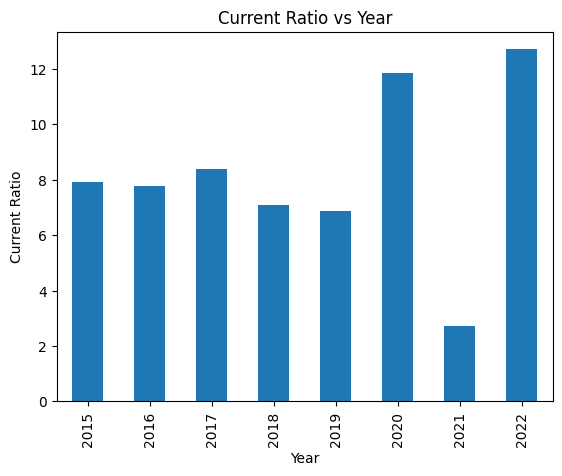

In [ ]:
final_result['Current Ratio'].plot(kind='bar')

plt.title('Current Ratio vs Year')
plt.xlabel('Year')
plt.ylabel('Current Ratio')

# display the chart
plt.show()

In [ ]:
final_result["Profitability: Retun on Equity"] *= 100

In [ ]:
final_result[['Net Income','Total Stock Holders Equity','Profitability: Retun on Equity']]

,Net Income,Total Stock Holders Equity,Profitability: Retun on Equity
year,,,
2015,3345000000,28503000000,11.735607
2016,3172000000,29098000000,10.901093
2017,4970000000,31825000000,15.616654
2018,4305000000,32374000000,13.297708
2019,4476000000,33547000000,13.342475
2020,4932000000,35283000000,13.978403
2021,5901000000,37806000000,15.608634
2022,5178000000,37744000000,13.718737


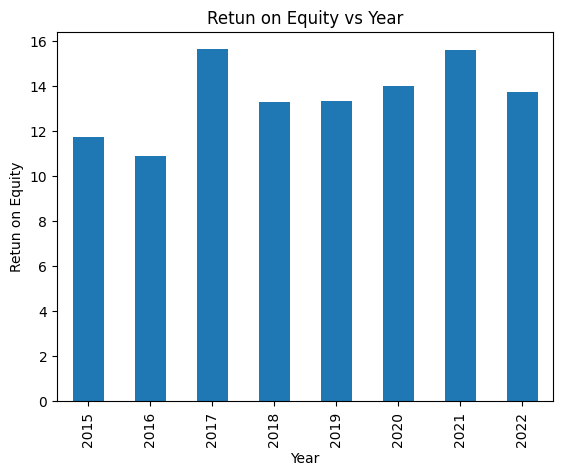

In [ ]:
final_result['Profitability: Retun on Equity'].plot(kind='bar')

plt.title('Retun on Equity vs Year')
plt.xlabel('Year')
plt.ylabel('Retun on Equity')

# display the chart
plt.show()

In [ ]:
final_result[['Total Current Liabilities','Total Stock Holders Equity','Liabilities to Equity Ratio']]

,Total Current Liabilities,Total Stock Holders Equity,Liabilities to Equity Ratio
year,,,
2015,1068000000,28503000000,0.037470
2016,1094000000,29098000000,0.037597
2017,1161000000,31825000000,0.036481
2018,1292000000,32374000000,0.039909
2019,1167000000,33547000000,0.034787
2020,1028000000,35283000000,0.029136
2021,7488000000,37806000000,0.198064
2022,1294000000,37744000000,0.034284


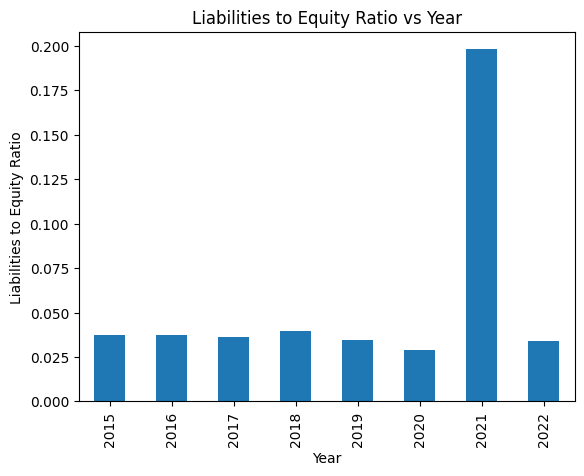

In [ ]:
final_result['Liabilities to Equity Ratio'].plot(kind='bar')

plt.title('Liabilities to Equity Ratio vs Year')
plt.xlabel('Year')
plt.ylabel('Liabilities to Equity Ratio')

# display the chart
plt.show()

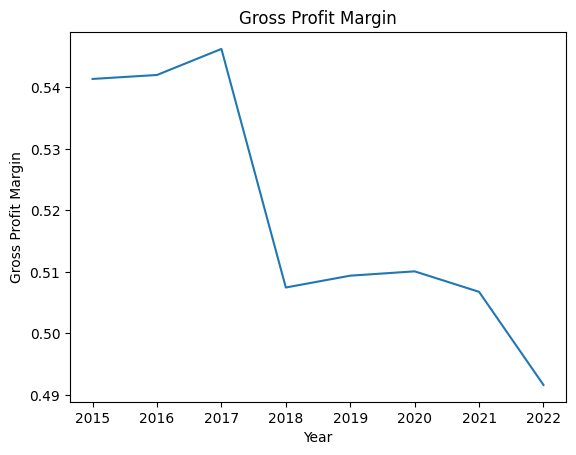

In [ ]:
final_result['Profitability : Gross Profit Margin'].plot(kind='line')

plt.title('Gross Profit Margin')
plt.xlabel('Year')
plt.ylabel('Gross Profit Margin')

# display the chart
plt.show()

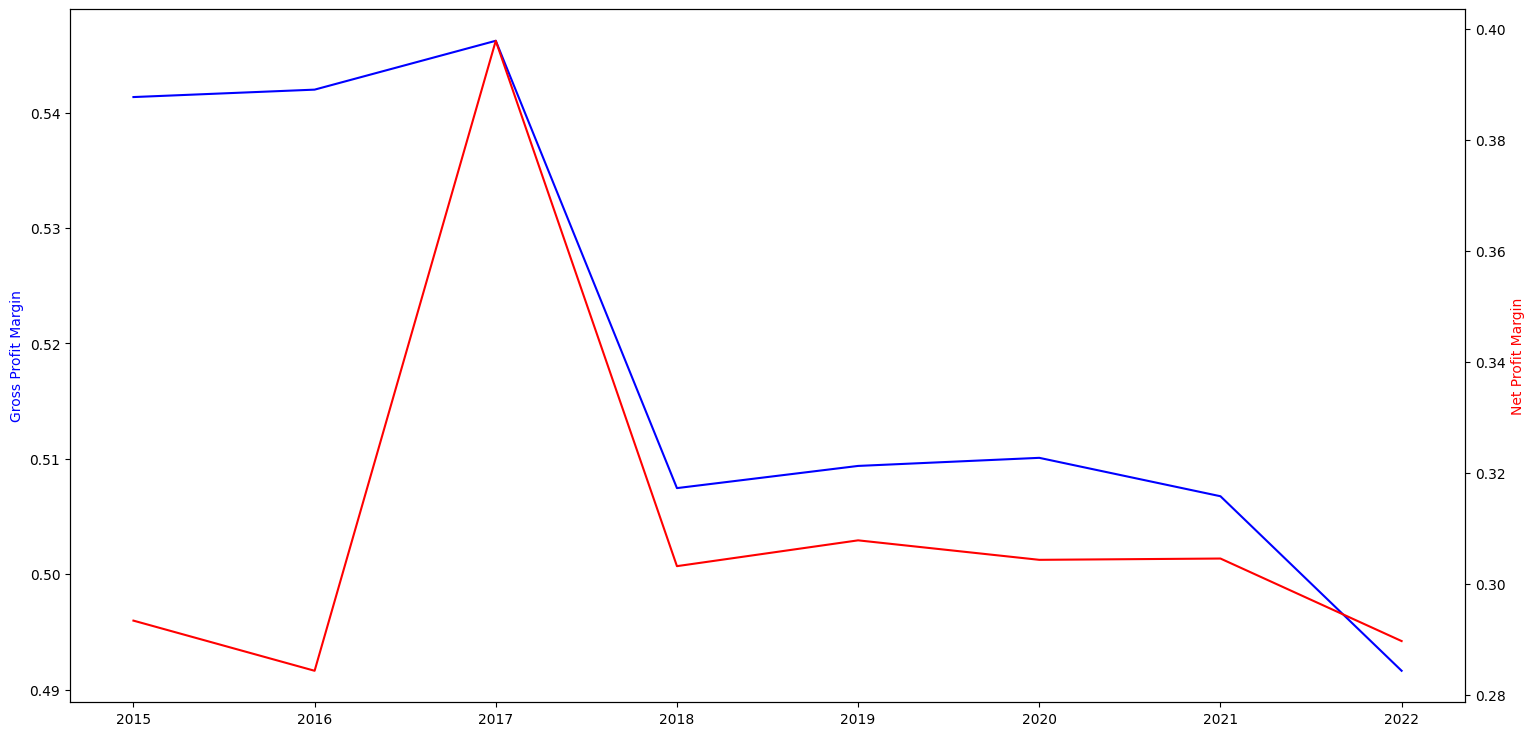

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 9))

ax1.plot(final_result.index, final_result['Profitability : Gross Profit Margin'], color='blue')
ax1.set_ylabel("Gross Profit Margin", color='blue')

ax2 = ax1.twinx()

ax2.plot(final_result.index, final_result['Profitability : Net Profit Margin'], color='red')
ax2.set_ylabel("Net Profit Margin", color='red')

plt.xticks(rotation=45)
plt.show()

In [ ]:
final_result[['revenue','Total Current Assets','Efficiency : Asset turnover ratio']]

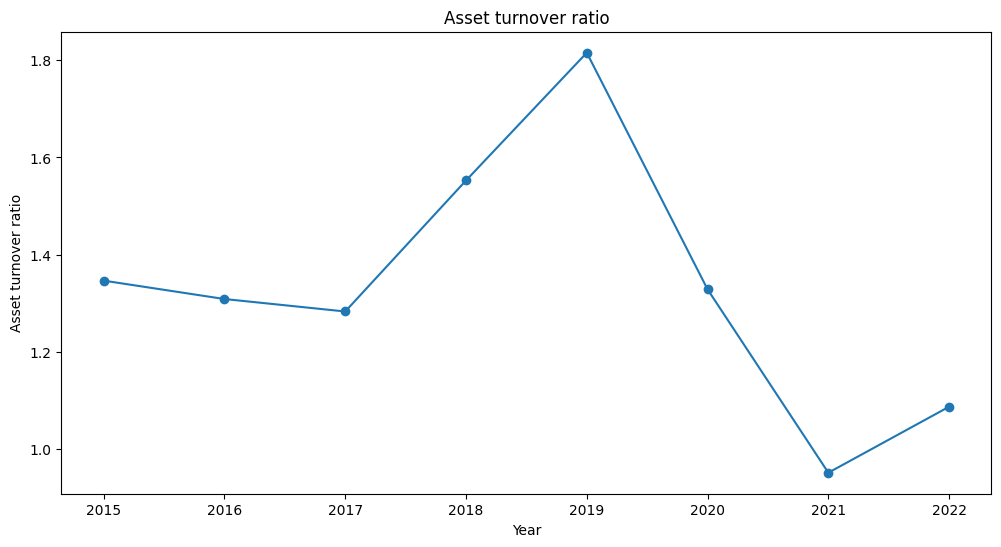

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(final_result['Efficiency : Asset turnover ratio'], marker='o')


ax.set_title('Asset turnover ratio')
ax.set_xlabel('Year')
ax.set_ylabel('Asset turnover ratio')
plt.show()

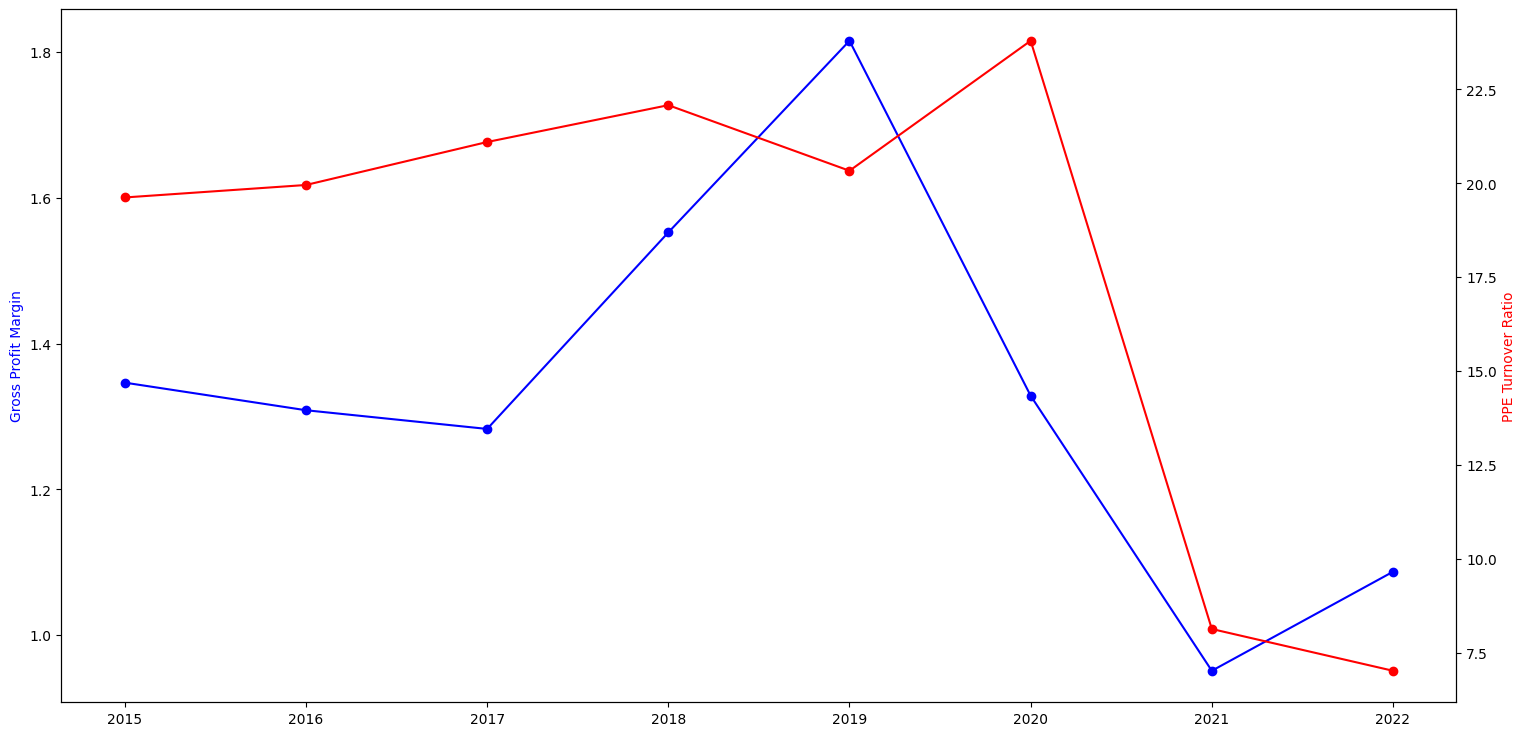

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 9))

ax1.plot(final_result.index, final_result['Efficiency : Asset turnover ratio'], color='blue',marker='o')
ax1.set_ylabel("Gross Profit Margin", color='blue')

ax2 = ax1.twinx()

ax2.plot(final_result.index, final_result['PPE Turnover Ratio'], color='red',marker='o')
ax2.set_ylabel("PPE Turnover Ratio", color='red')

plt.xticks(rotation=45)



plt.show()

In [ ]:
final_result['Dividend Payout Ratio'] *=-1
final_result['Dividend Yield'] *=-1

In [ ]:
final_result[['Number of shares','Dividends Paid','Earnings per share']]

,Number of shares,Dividends Paid,Earnings per share
year,,,
2015,2000000,-1476000000,20.10
2016,2000000,-1545000000,19.29
2017,2000000,-1662000000,30.54
2018,2000000,-1968000000,26.86
2019,2000000,-2096000000,28.69
2020,2000000,-2260000000,32.13
2021,2000000,-2547000000,38.45
2022,2000000,-2990000000,33.74


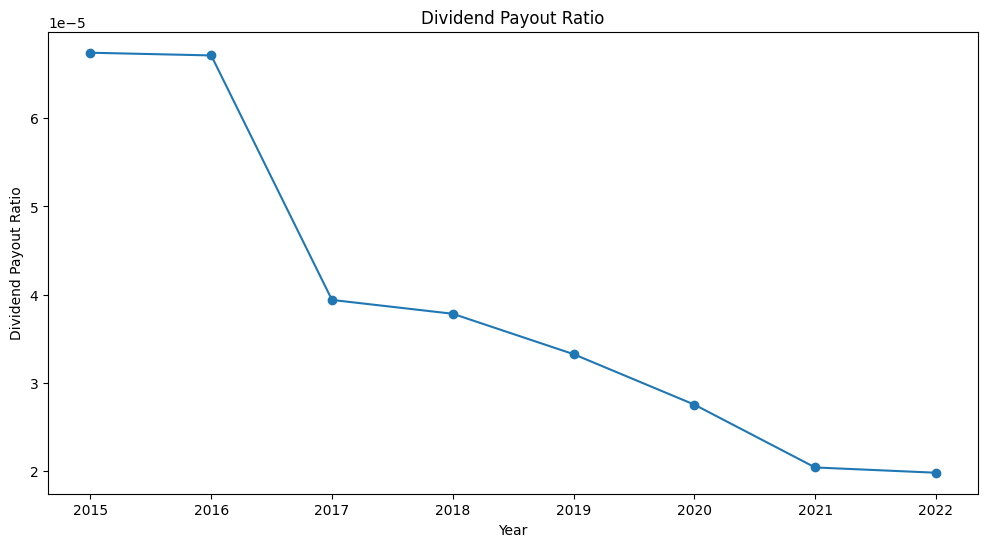

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(final_result['Dividend Payout Ratio'], marker='o')

ax.set_title('Dividend Payout Ratio')
ax.set_xlabel('Year')
ax.set_ylabel('Dividend Payout Ratio')
plt.show()

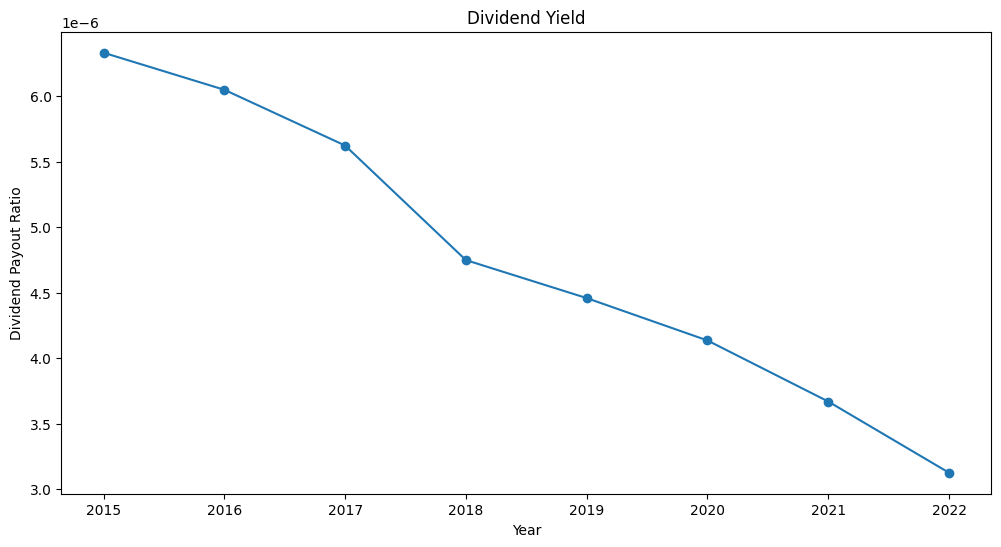

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(final_result['Dividend Yield'], marker='o')


ax.set_title('Dividend Yield')
ax.set_xlabel('Year')
ax.set_ylabel('Dividend Payout Ratio')
plt.show()

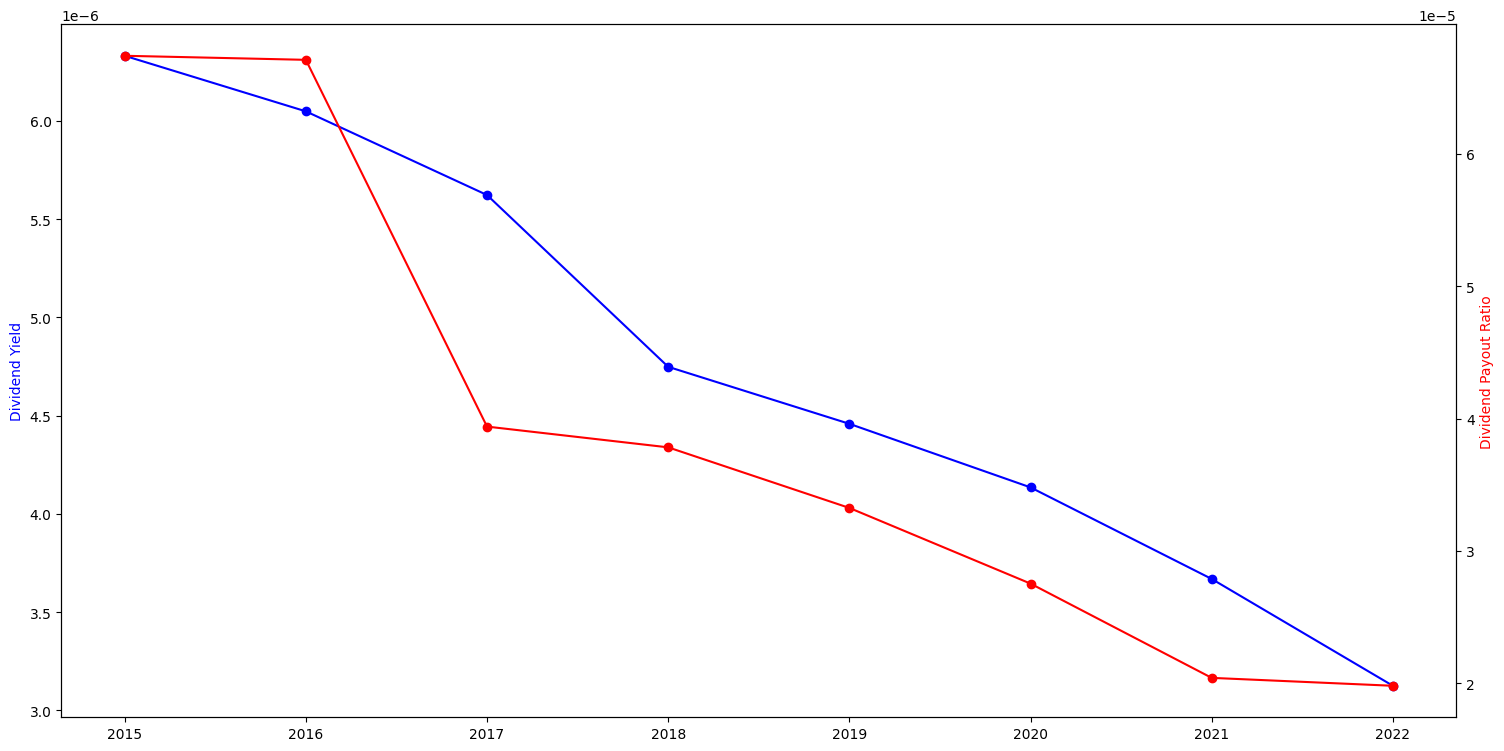

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 9))

ax1.plot(final_result.index, final_result['Dividend Yield'], color='blue',marker='o')
ax1.set_ylabel("Dividend Yield", color='blue')

ax2 = ax1.twinx()

ax2.plot(final_result.index, final_result['Dividend Payout Ratio'], color='red',marker='o')
ax2.set_ylabel("Dividend Payout Ratio", color='red')

plt.xticks(rotation=45)

plt.show()

In [ ]:
final_result['Ratio of Cash from Operations to Total Debt'] *=100

In [ ]:
final_result[['Free Cash Flow','Total Debt','Ratio of Cash from Operations to Total Debt']]

,Free Cash Flow,Total Debt,Ratio of Cash from Operations to Total Debt
year,,,
2015,2783000000,4930000000,60.933063
2016,2035000000,4915000000,43.825025
2017,3673000000,5014000000,76.346231
2018,2871000000,5063000000,60.734742
2019,2630000000,4955000000,58.203835
2020,3549000000,7364000000,50.828354
2021,4603000000,7364000000,50.828354
2022,4423000000,8489000000,58.381435


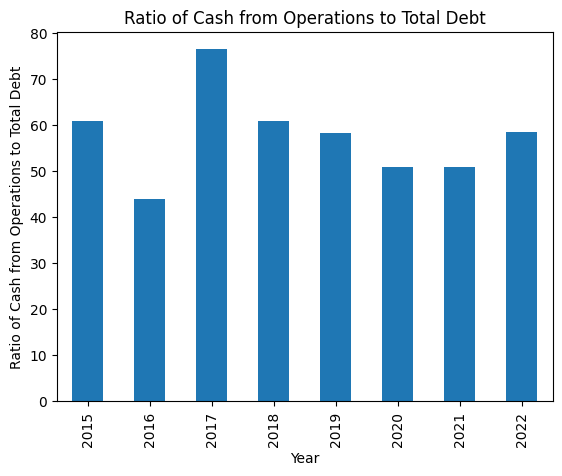

In [ ]:
final_result['Ratio of Cash from Operations to Total Debt'].plot(kind='bar')

plt.title('Ratio of Cash from Operations to Total Debt')
plt.xlabel('Year')
plt.ylabel('Ratio of Cash from Operations to Total Debt')

plt.show()

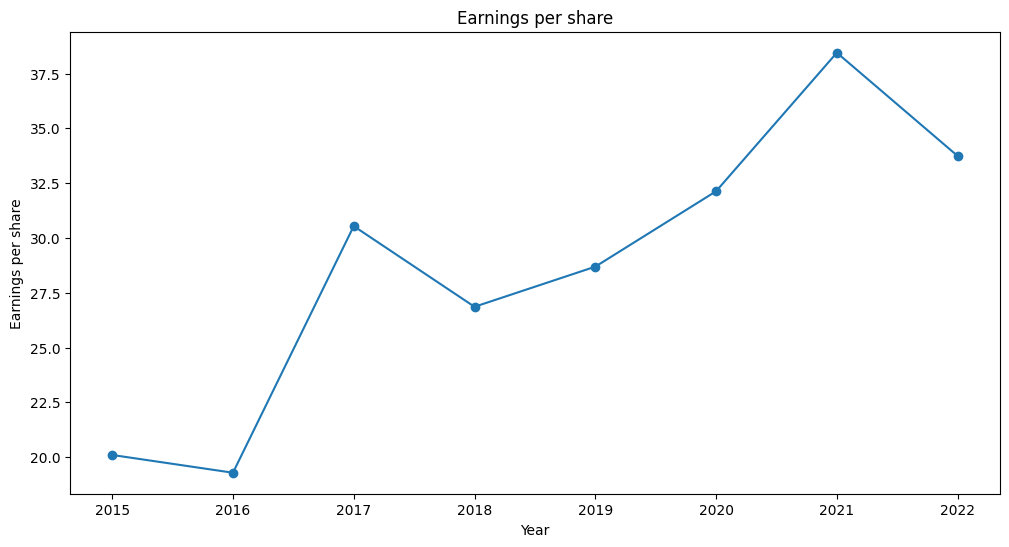

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(final_result['Earnings per share'], marker='o')


ax.set_title('Earnings per share')
ax.set_xlabel('Year')
ax.set_ylabel('Earnings per share')
plt.show()

In [ ]:
final_result[['revenue','Net Account Receivable','Accounts Payable','A/R turnover','A/P turnover']]

,revenue,Net Account Receivable,Accounts Payable,A/R turnover,A/P turnover
year,,,,,
2015,11401000000,2237000000,1068000000,5.096558,4.896067
2016,11155000000,2350000000,1094000000,4.746809,4.670018
2017,12491000000,2699000000,1161000000,4.628010,4.881998
2018,14198000000,2657000000,1292000000,5.343621,5.412539
2019,14539000000,3179000000,1167000000,4.573451,6.112254
2020,16205000000,3535000000,1028000000,4.584158,7.722763
2021,19374000000,3789000000,1028000000,5.113222,7.722763
2022,17873000000,3264000000,1028000000,5.475797,7.722763


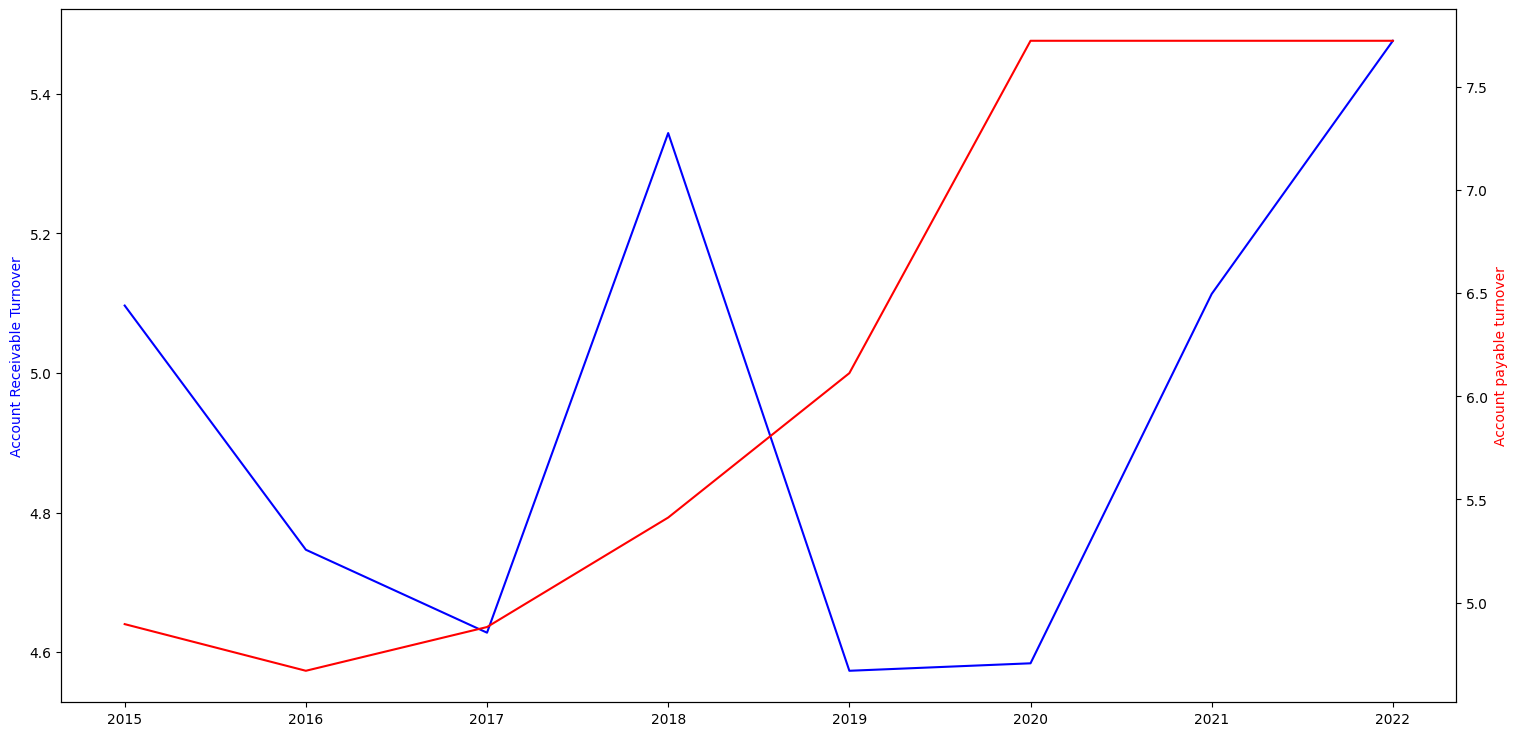

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 9))

ax1.plot(final_result.index, final_result['A/R turnover'], color='blue')
ax1.set_ylabel("Account Receivable Turnover", color='blue')

ax2 = ax1.twinx()

ax2.plot(final_result.index, final_result['A/P turnover'], color='red')
ax2.set_ylabel("Account payable turnover", color='red')

plt.xticks(rotation=45)

plt.show()

In [ ]:
import yfinance as yf
MyTicker = yf.Ticker("BA")
MyTicker1 = yf.Ticker("BLK")
MyTicker2 = yf.Ticker("ITA")

In [ ]:
boeing = yf.download("BA", start="2007-01-01")
blackrock = yf.download("BLK", start="2007-01-01")
ishares_aero = yf.download("ITA", start="2007-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
boeing_stock_price = boeing.loc['2007':]
black_rock_stock_price = blackrock.loc['2015':]
ishares_aero_stock_price = ishares_aero.loc['2007':]

In [ ]:
boeing_stock_price = boeing_stock_price.iloc[::-1]
black_rock_stock_price = black_rock_stock_price.iloc[::-1]
ishares_aero_stock_price = ishares_aero_stock_price.iloc[::-1]

In [ ]:
boeing_stock_price['Date'] = pd.to_datetime(boeing_stock_price.index)
black_rock_stock_price['Date'] = pd.to_datetime(black_rock_stock_price.index)
ishares_aero_stock_price['Date'] = pd.to_datetime(ishares_aero_stock_price.index)

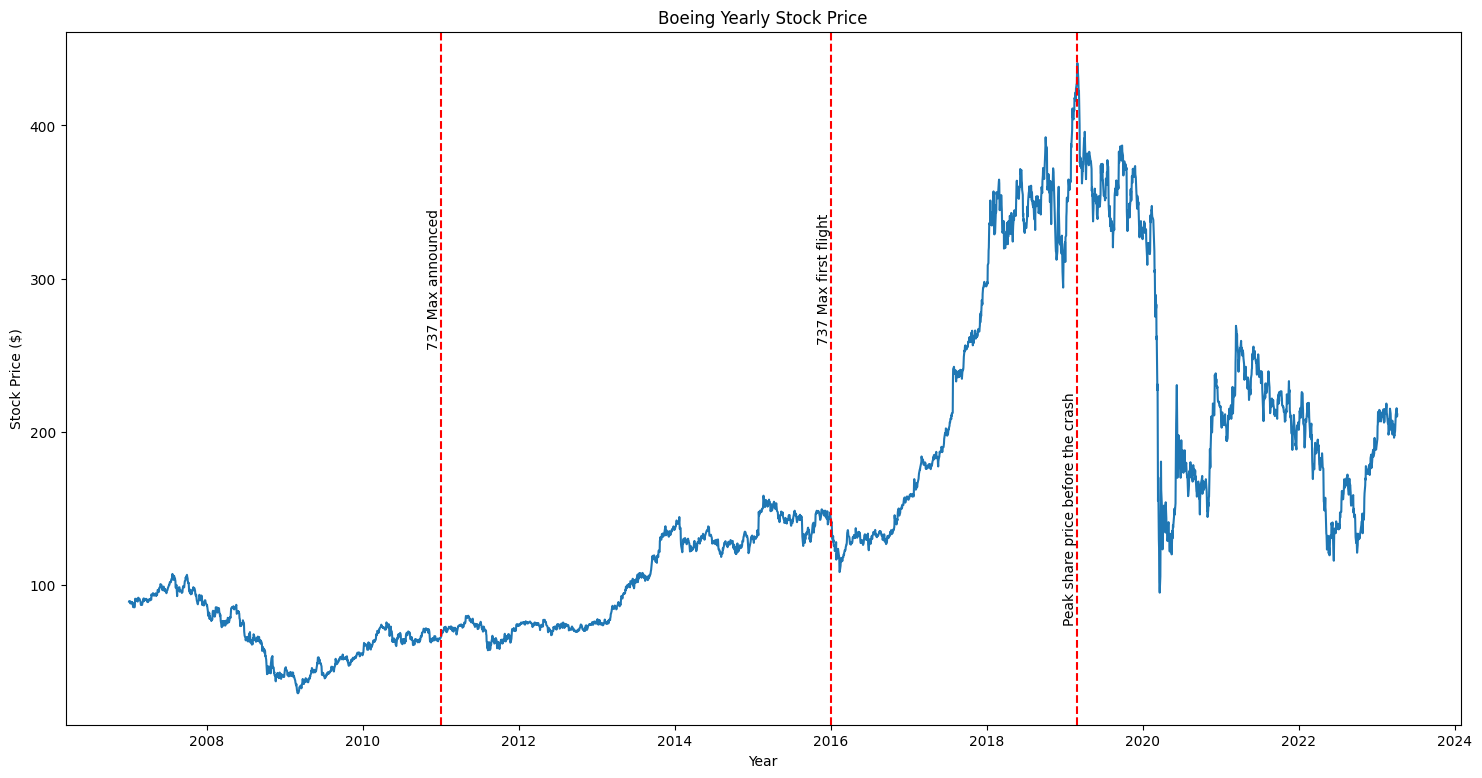

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(boeing_stock_price['Date'], boeing_stock_price['Close'])

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.set_title('Boeing Yearly Stock Price')
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price ($)')

idx1 = boeing_stock_price.loc['2011-01-03'].name
idx2 = boeing_stock_price.loc['2016-01-04'].name
idx3 = boeing_stock_price['Close'].idxmax()

ax.axvline(x=idx1, linestyle='--', color='red')
ax.text(idx1, 300, '737 Max announced', rotation=90, va='center', ha='right')
ax.axvline(x=idx2, linestyle='--', color='red')
ax.text(idx2, 300, '737 Max first flight', rotation=90, va='center', ha='right')
ax.axvline(x=idx3, linestyle='--', color='red')
ax.text(idx3, 150, 'Peak share price before the crash', rotation=90, va='center', ha='right')

plt.show()

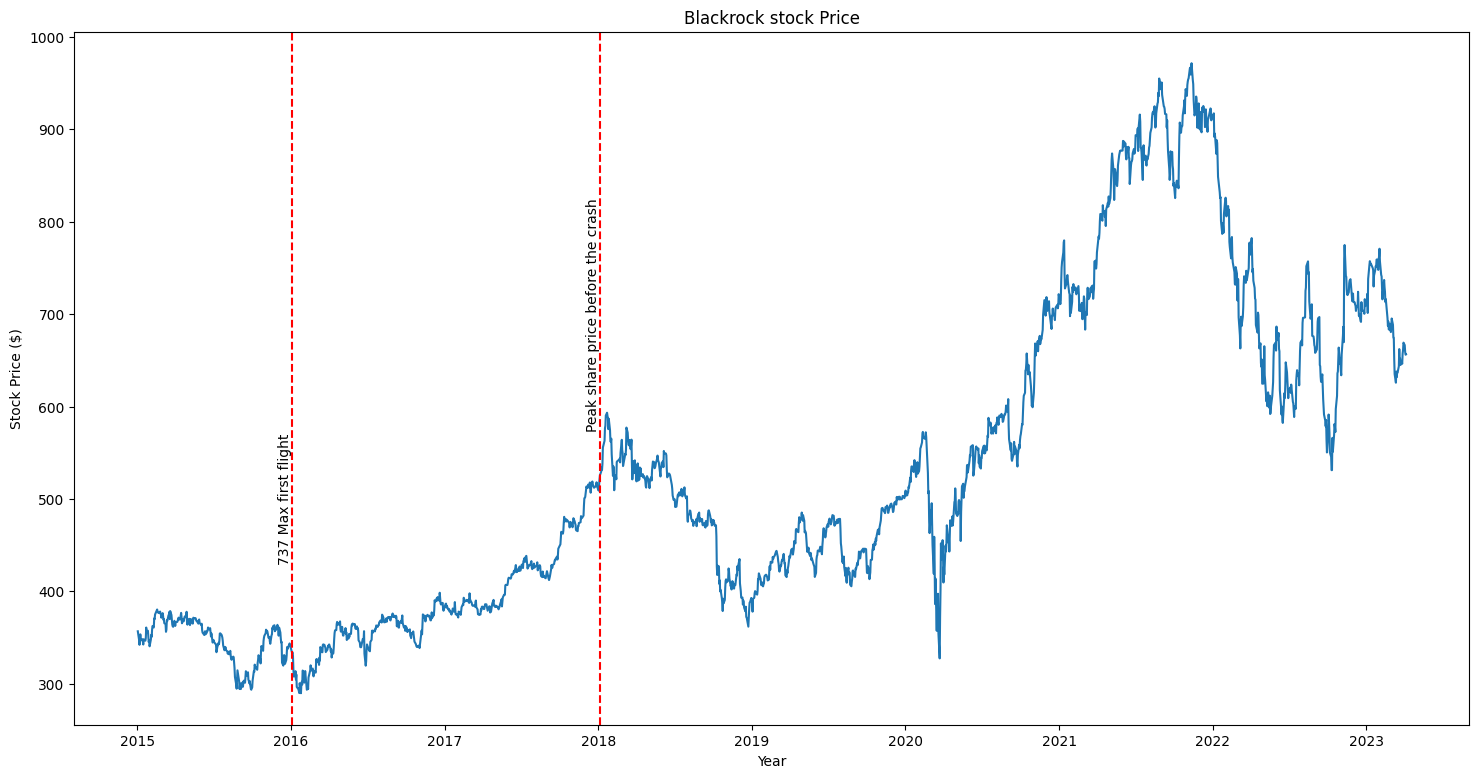

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(black_rock_stock_price['Date'], black_rock_stock_price['Close'])

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)


ax.set_title('Blackrock stock Price')
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price ($)')

idx2 = black_rock_stock_price.loc['2016-01-04'].name
idx3 = black_rock_stock_price.loc['2018-01-04'].name

ax.axvline(x=idx2, linestyle='--', color='red')
ax.text(idx2, 500, '737 Max first flight', rotation=90, va='center', ha='right')
ax.axvline(x=idx3, linestyle='--', color='red')
ax.text(idx3, 700, 'Peak share price before the crash', rotation=90, va='center', ha='right')



plt.show()

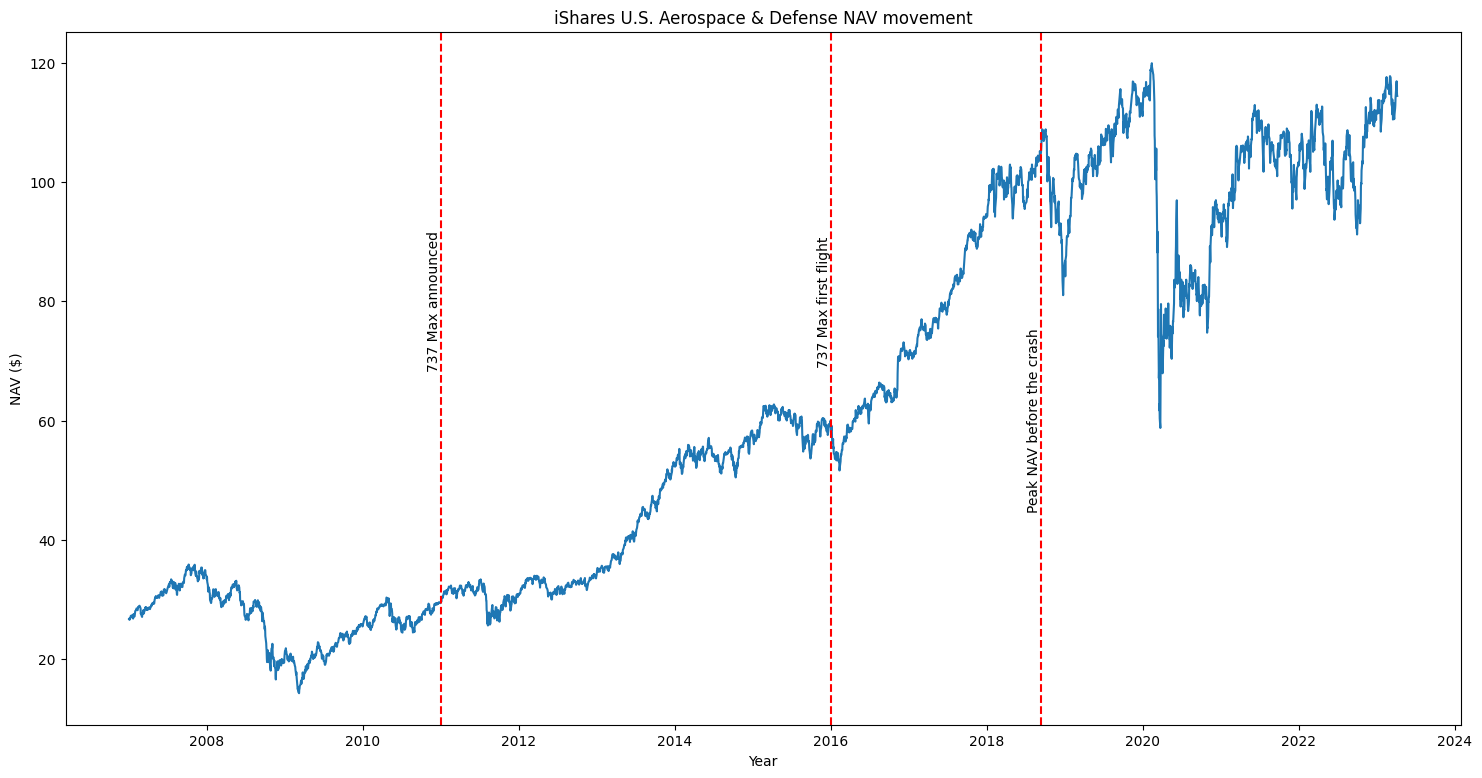

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(ishares_aero_stock_price['Date'], ishares_aero_stock_price['Close'])

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.set_title('iShares U.S. Aerospace & Defense NAV movement')
ax.set_xlabel('Year')
ax.set_ylabel('NAV ($)')

idx1 = ishares_aero_stock_price.loc['2011-01-03'].name
idx2 = ishares_aero_stock_price.loc['2016-01-04'].name
idx3 = ishares_aero_stock_price.loc['2018-09-13'].name

ax.axvline(x=idx1, linestyle='--', color='red')
ax.text(idx1, 80, '737 Max announced', rotation=90, va='center', ha='right')
ax.axvline(x=idx2, linestyle='--', color='red')
ax.text(idx2, 80, '737 Max first flight', rotation=90, va='center', ha='right')
ax.axvline(x=idx3, linestyle='--', color='red')
ax.text(idx3, 60, 'Peak NAV before the crash', rotation=90, va='center', ha='right')

plt.show()

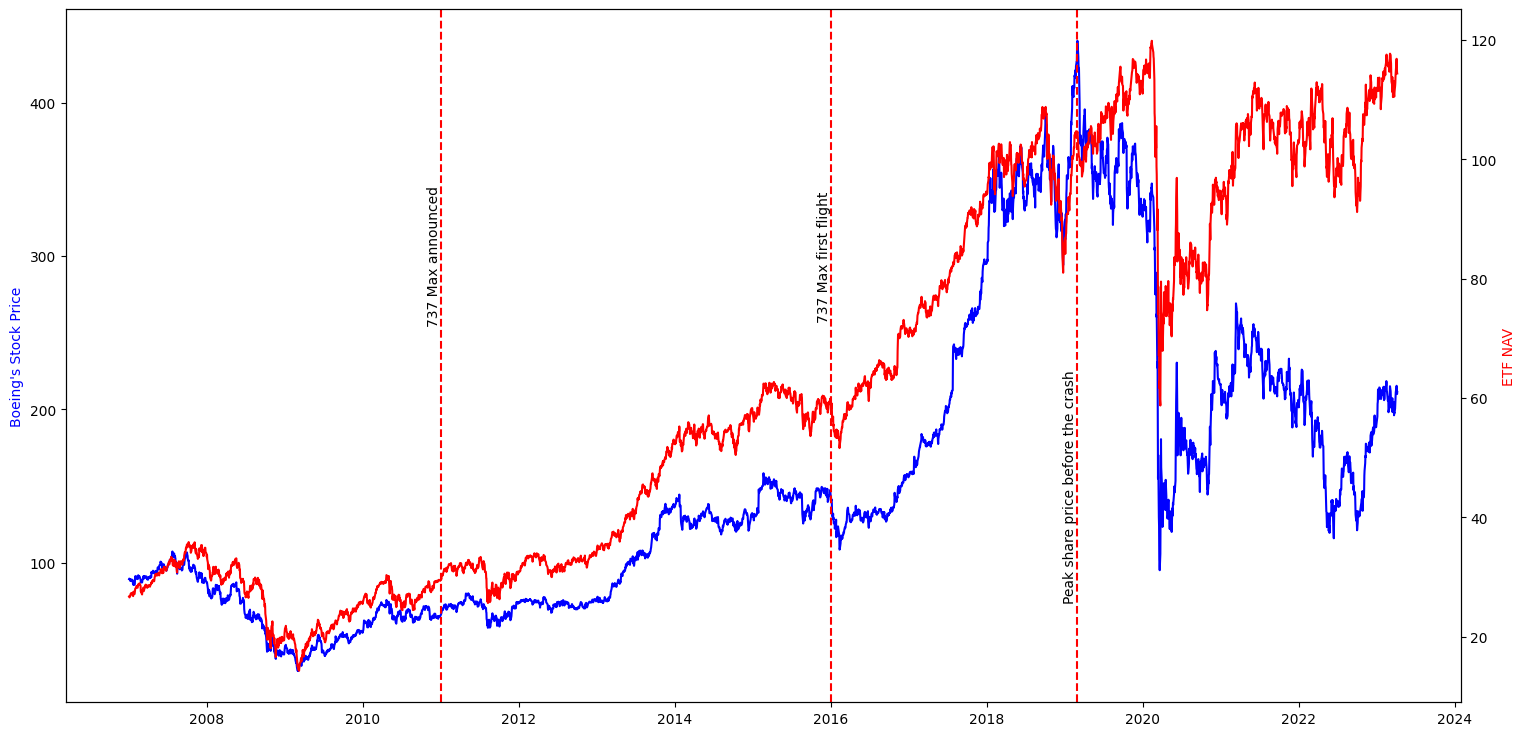

In [ ]:
boeing_stock_price.index = pd.to_datetime(boeing_stock_price.index)
ishares_aero_stock_price.index = pd.to_datetime(ishares_aero_stock_price.index)

fig, ax1 = plt.subplots(figsize=(18, 9))

ax1.plot(boeing_stock_price.index, boeing_stock_price['Close'], color='blue')
ax1.set_ylabel("Boeing's Stock Price", color='blue')

ax2 = ax1.twinx()

ax2.plot(ishares_aero_stock_price.index, ishares_aero_stock_price['Close'], color='red')
ax2.set_ylabel("ETF NAV", color='red')

date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)




idx1 = boeing_stock_price.loc['2011-01-03'].name
idx2 = boeing_stock_price.loc['2016-01-04'].name
idx3 = boeing_stock_price['Close'].idxmax()

ax1.axvline(x=idx1, linestyle='--', color='red')
ax1.text(idx1, 300, '737 Max announced', rotation=90, va='center', ha='right')
ax1.axvline(x=idx2, linestyle='--', color='red')
ax1.text(idx2, 300, '737 Max first flight', rotation=90, va='center', ha='right')
ax1.axvline(x=idx3, linestyle='--', color='red')
ax1.text(idx3, 150, 'Peak share price before the crash', rotation=90, va='center', ha='right')


plt.show()